In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from matplotlib.cm import get_cmap
import numpy as np

/var/folders/hm/hb18k8k54xd7nbc0n2gg1yh80000gn/T/ipykernel_72406/1870063021.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Blues')


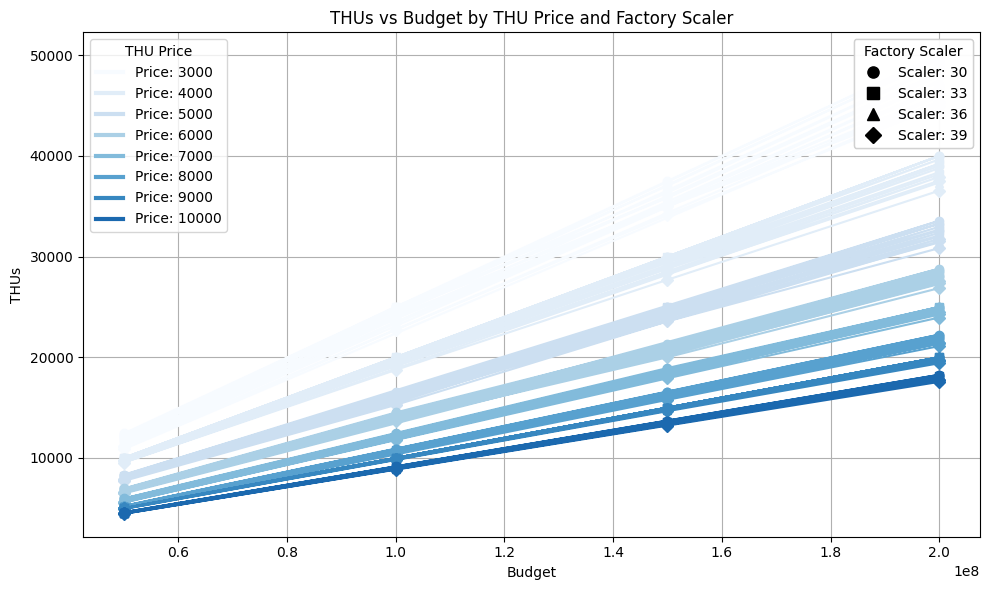

In [6]:

# ==== Load your CSV data ====
df = pd.read_csv('../sensitivity_results.csv')

# Ensure correct data types (just in case)
df['budget'] = df['budget'].astype(float)
df['THUs'] = df['THUs'].astype(float)

# ==== Parameters ====
thu_prices = sorted(df['thu_price'].unique())
factory_scalers = sorted(df['factory_scaler'].unique())

# Create shades of blue for thu_price
cmap = get_cmap('Blues')
colors = {price: cmap(i / (len(thu_prices) + 1)) for i, price in enumerate(thu_prices)}

# Create markers for factory_scaler
markers_list = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']  # enough for many cases
markers = {fs: markers_list[i % len(markers_list)] for i, fs in enumerate(factory_scalers)}

# ==== Plot ====
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each combination
for price in thu_prices:
    for fs in factory_scalers:
        subset = df[(df['thu_price'] == price) & (df['factory_scaler'] == fs)]
        ax.plot(
            subset['budget'], subset['THUs'],
            label=f"Price {price}, Scaler {fs}",
            color=colors[price],
            marker=markers[fs],
            linestyle='-'
        )

# ==== Legends ====
# Separate legends for price (color) and scaler (marker)

# Price legend
price_handles = [
    plt.Line2D([0], [0], color=colors[p], lw=3) for p in thu_prices
]
price_labels = [f"Price: {p}" for p in thu_prices]
legend1 = ax.legend(price_handles, price_labels, title="THU Price", loc='upper left')

# Scaler legend
scaler_handles = [
    plt.Line2D([0], [0], color='black', marker=markers[fs], linestyle='None', markersize=8)
    for fs in factory_scalers
]
scaler_labels = [f"Scaler: {fs}" for fs in factory_scalers]
legend2 = ax.legend(scaler_handles, scaler_labels, title="Factory Scaler", loc='upper right')

# Add legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

# ==== Labels and formatting ====
ax.set_xlabel("Budget")
ax.set_ylabel("THUs")
ax.set_title("THUs vs Budget by THU Price and Factory Scaler")
ax.grid(True)

plt.tight_layout()
plt.show()


/var/folders/hm/hb18k8k54xd7nbc0n2gg1yh80000gn/T/ipykernel_72406/3916371029.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues')


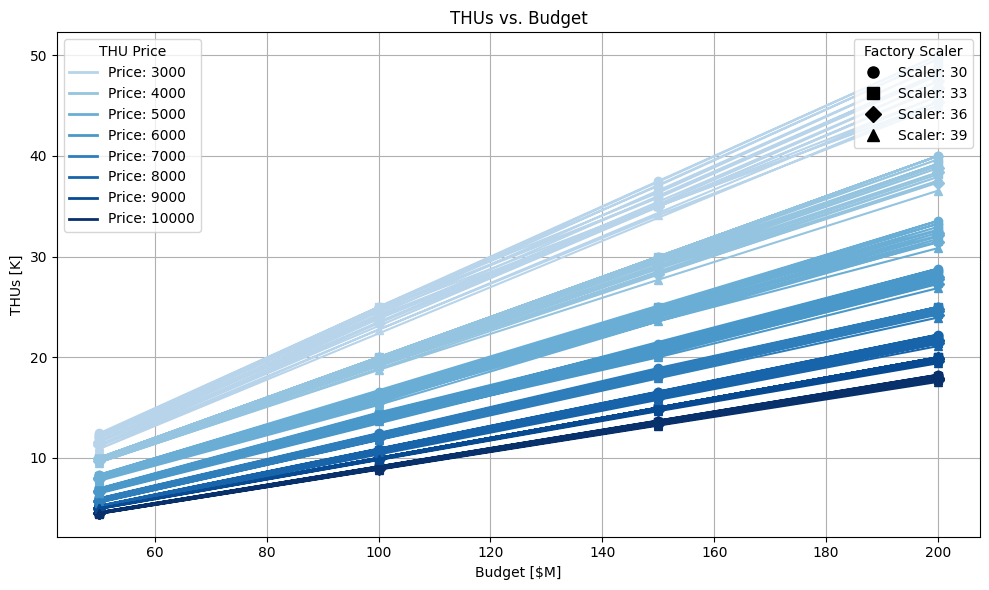

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define sets
budgets = [50000000, 100000000, 150000000, 200000000]
thu_prices = sorted(df['thu_price'].unique())
factory_scalers = sorted(df['factory_scaler'].unique())

# Create remapped colormap for thu_price (shades of blue)
norm = mcolors.Normalize(vmin=min(thu_prices), vmax=max(thu_prices))
blues = cm.get_cmap('Blues')
# Only take the range 0.3–1.0 from the colormap
color_map = cm.ScalarMappable(norm=norm, cmap=mcolors.LinearSegmentedColormap.from_list(
    'truncated_blues', blues(np.linspace(0.3, 1, 256))
))

# Marker styles for factory_scaler
markers = ['o', 's', 'D', '^']
marker_map = {fs: markers[i % len(markers)] for i, fs in enumerate(factory_scalers)}

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for fs in factory_scalers:
    for tp in thu_prices:
        subset = df[(df['factory_scaler'] == fs) & (df['thu_price'] == tp)]
        ax.plot(
            subset['budget']/1e6, subset['THUs']/1e3,
            color=color_map.to_rgba(tp),
            marker=marker_map[fs],
            linestyle='-',
            label=f"Price: {tp}, Scaler: {fs}"
        )

# Legends
from matplotlib.lines import Line2D

# Legend for thu_price (colors)
color_legend = [
    Line2D([0], [0], color=color_map.to_rgba(tp), lw=2, label=f"Price: {tp}")
    for tp in thu_prices
]

# Legend for factory_scaler (markers)
marker_legend = [
    Line2D([0], [0], color='black', marker=marker_map[fs], linestyle='',
           markersize=8, label=f"Scaler: {fs}")
    for fs in factory_scalers
]

# Add legends to plot
legend1 = ax.legend(handles=color_legend, title="THU Price", loc="upper left")
legend2 = ax.legend(handles=marker_legend, title="Factory Scaler", loc="upper right")
ax.add_artist(legend1)

ax.set_xlabel("Budget [$M]")
ax.set_ylabel("THUs [K]")
ax.set_title("THUs vs. Budget")
ax.grid(True)
plt.tight_layout()
plt.show()


/var/folders/hm/hb18k8k54xd7nbc0n2gg1yh80000gn/T/ipykernel_72406/2890425776.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds = cm.get_cmap('Reds')


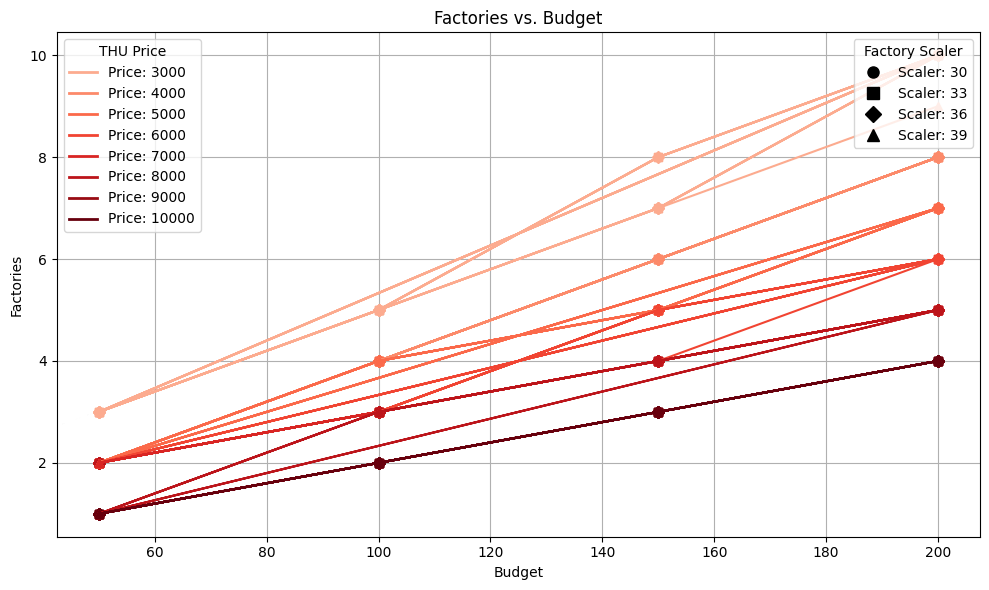

In [12]:
# --- RED plot for Factories ---
norm_red = mcolors.Normalize(vmin=min(thu_prices), vmax=max(thu_prices))
reds = cm.get_cmap('Reds')
trunc_reds = mcolors.LinearSegmentedColormap.from_list(
    'truncated_reds', reds(np.linspace(0.3, 1, 256))
)
color_map_red = cm.ScalarMappable(norm=norm_red, cmap=trunc_reds)

fig, ax = plt.subplots(figsize=(10, 6))

for fs in factory_scalers:
    for tp in thu_prices:
        subset = df[(df['factory_scaler'] == fs) & (df['thu_price'] == tp)]
        ax.plot(
            subset['budget']/1e6, subset['Factories'],
            color=color_map_red.to_rgba(tp),
            marker=marker_map[fs],
            linestyle='-',
            label=f"Price: {tp}, Scaler: {fs}"
        )

color_legend_red = [
    Line2D([0], [0], color=color_map_red.to_rgba(tp), lw=2, label=f"Price: {tp}")
    for tp in thu_prices
]

legend1 = ax.legend(handles=color_legend_red, title="THU Price", loc="upper left")
legend2 = ax.legend(handles=marker_legend, title="Factory Scaler", loc="upper right")
ax.add_artist(legend1)

ax.set_xlabel("Budget")
ax.set_ylabel("Factories")
ax.set_title("Factories vs. Budget")
ax.grid(True)
plt.tight_layout()
plt.show()


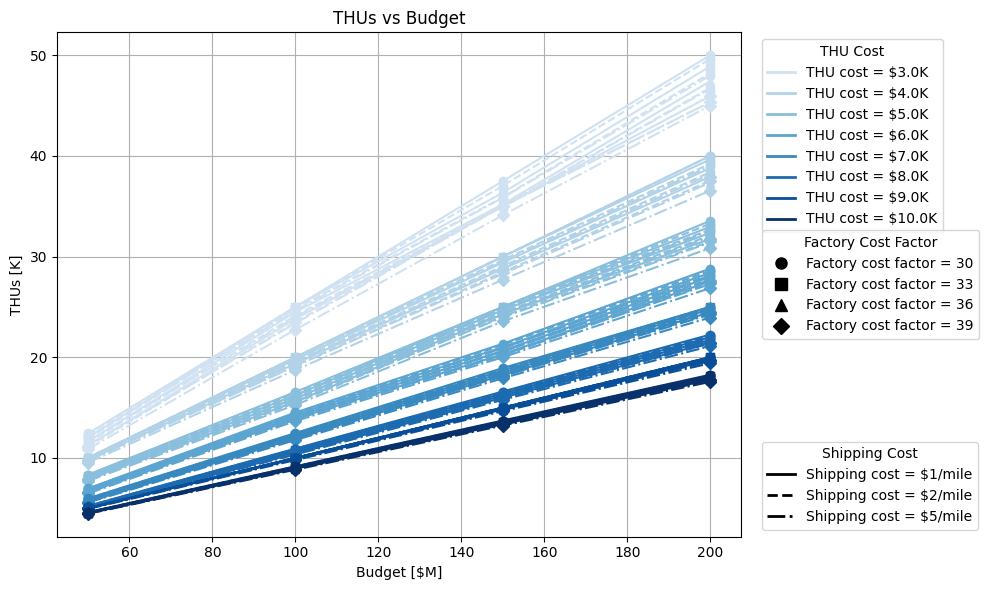

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Parameters
budget_values = [50_000_000, 100_000_000, 150_000_000, 200_000_000]
thu_prices = sorted(df['thu_price'].unique())
factory_scalers = sorted(df['factory_scaler'].unique())
shipping_costs = sorted(df['shipping_cost'].unique())

# Color map for thu_price (avoid very light)
cmap = plt.cm.Blues
norm = Normalize(vmin=min(thu_prices), vmax=max(thu_prices))
color_values = [cmap(0.2 + 0.8 * (norm(p))) for p in thu_prices]  # shift min color up to 0.2

# Marker mapping for factory_scaler
markers = ['o', 's', '^', 'D']
marker_map = dict(zip(factory_scalers, markers))

# Line style mapping for shipping_cost
linestyles = ['-', '--', '-.']
linestyle_map = dict(zip(shipping_costs, linestyles))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot THUs
for tp, color in zip(thu_prices, color_values):
    for fs in factory_scalers:
        for sc in shipping_costs:
            subset = df[
                (df['thu_price'] == tp) &
                (df['factory_scaler'] == fs) &
                (df['shipping_cost'] == sc)
            ]
            subset = subset[subset['budget'].isin(budget_values)]
            ax.plot(
                subset['budget']/1e6,
                subset['THUs']/1e3,
                color=color,
                marker=marker_map[fs],
                linestyle=linestyle_map[sc],
                label=f"TP={tp}, FS={fs}, SC={sc}"
            )

# Build grouped legends
color_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in color_values]
color_labels = [f"THU cost = ${tp/1000}K" for tp in thu_prices]

marker_handles = [plt.Line2D([0], [0], color='black', marker=m, linestyle='', markersize=8) 
                  for m in markers]
marker_labels = [f"Factory cost factor = {fs}" for fs in factory_scalers]

linestyle_handles = [plt.Line2D([0], [0], color='black', linestyle=ls, lw=2)
                     for ls in linestyles]
linestyle_labels = [f"Shipping cost = ${sc}/mile" for sc in shipping_costs]

first_legend = ax.legend(color_handles, color_labels, title="THU Cost", loc="upper left", bbox_to_anchor=(1.02, 1))
second_legend = ax.legend(marker_handles, marker_labels, title="Factory Cost Factor", loc="center left", bbox_to_anchor=(1.02, 0.5))
third_legend = ax.legend(linestyle_handles, linestyle_labels, title="Shipping Cost", loc="lower left", bbox_to_anchor=(1.02, 0))

ax.add_artist(first_legend)
ax.add_artist(second_legend)

ax.set_xlabel("Budget [$M]")
ax.set_ylabel("THUs [K]")
ax.set_title("THUs vs Budget")
ax.grid(True)

plt.tight_layout()
plt.show()


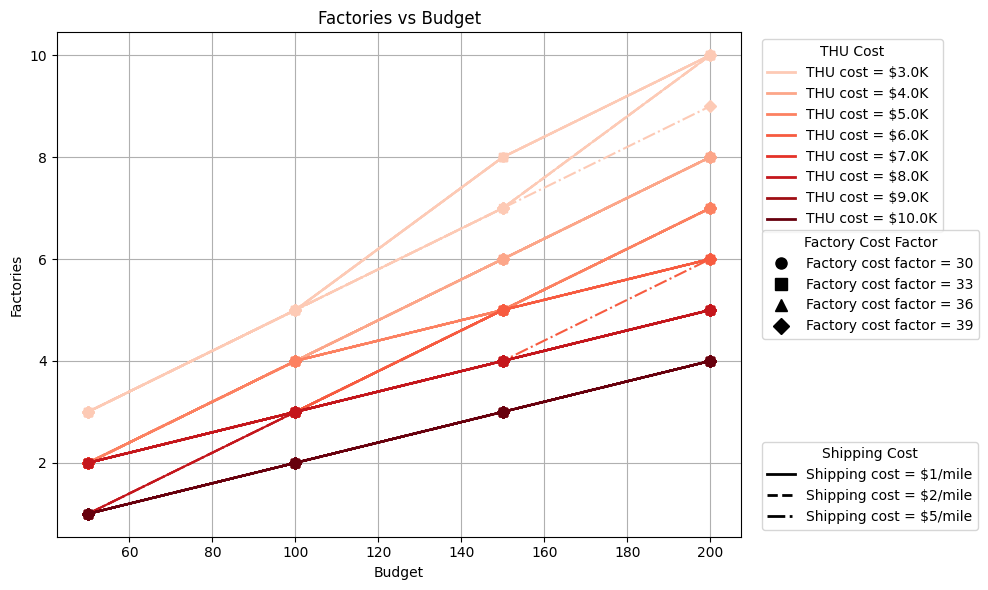

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load data
# df = pd.read_csv("your_data.csv")

# Parameters
budget_values = [50_000_000, 100_000_000, 150_000_000, 200_000_000]
thu_prices = sorted(df['thu_price'].unique())
factory_scalers = sorted(df['factory_scaler'].unique())
shipping_costs = sorted(df['shipping_cost'].unique())

# Red colormap for Factories (avoid very light reds)
cmap = cm.Reds
norm = Normalize(vmin=min(thu_prices), vmax=max(thu_prices))
color_values = [cmap(0.2 + 0.8 * norm(tp)) for tp in thu_prices]  # shift min color to 0.2

# Marker mapping for factory_scaler
markers = ['o', 's', '^', 'D']
marker_map = dict(zip(factory_scalers, markers))

# Line style mapping for shipping_cost
linestyles = ['-', '--', '-.']
linestyle_map = dict(zip(shipping_costs, linestyles))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Factories
for tp, color in zip(thu_prices, color_values):
    for fs in factory_scalers:
        for sc in shipping_costs:
            subset = df[
                (df['thu_price'] == tp) &
                (df['factory_scaler'] == fs) &
                (df['shipping_cost'] == sc)
            ]
            subset = subset[subset['budget'].isin(budget_values)]
            ax.plot(
                subset['budget']/1e6,
                subset['Factories'],
                color=color,
                marker=marker_map[fs],
                linestyle=linestyle_map[sc],
                label=f"TP={tp}, FS={fs}, SC={sc}"
            )

# Build grouped legends
color_handles = [Line2D([0], [0], color=color, lw=2) for color in color_values]
color_labels = [f"THU cost = ${tp/1000}K" for tp in thu_prices]

marker_handles = [Line2D([0], [0], color='black', marker=m, linestyle='', markersize=8) 
                  for m in markers]
marker_labels = [f"Factory cost factor = {fs}" for fs in factory_scalers]

linestyle_handles = [Line2D([0], [0], color='black', linestyle=ls, lw=2)
                     for ls in linestyles]
linestyle_labels = [f"Shipping cost = ${sc}/mile" for sc in shipping_costs]

first_legend = ax.legend(color_handles, color_labels, title="THU Cost", loc="upper left", bbox_to_anchor=(1.02, 1))
second_legend = ax.legend(marker_handles, marker_labels, title="Factory Cost Factor", loc="center left", bbox_to_anchor=(1.02, 0.5))
third_legend = ax.legend(linestyle_handles, linestyle_labels, title="Shipping Cost", loc="lower left", bbox_to_anchor=(1.02, 0))

ax.add_artist(first_legend)
ax.add_artist(second_legend)

ax.set_xlabel("Budget")
ax.set_ylabel("Factories")
ax.set_title("Factories vs Budget")
ax.grid(True)

plt.tight_layout()
plt.show()


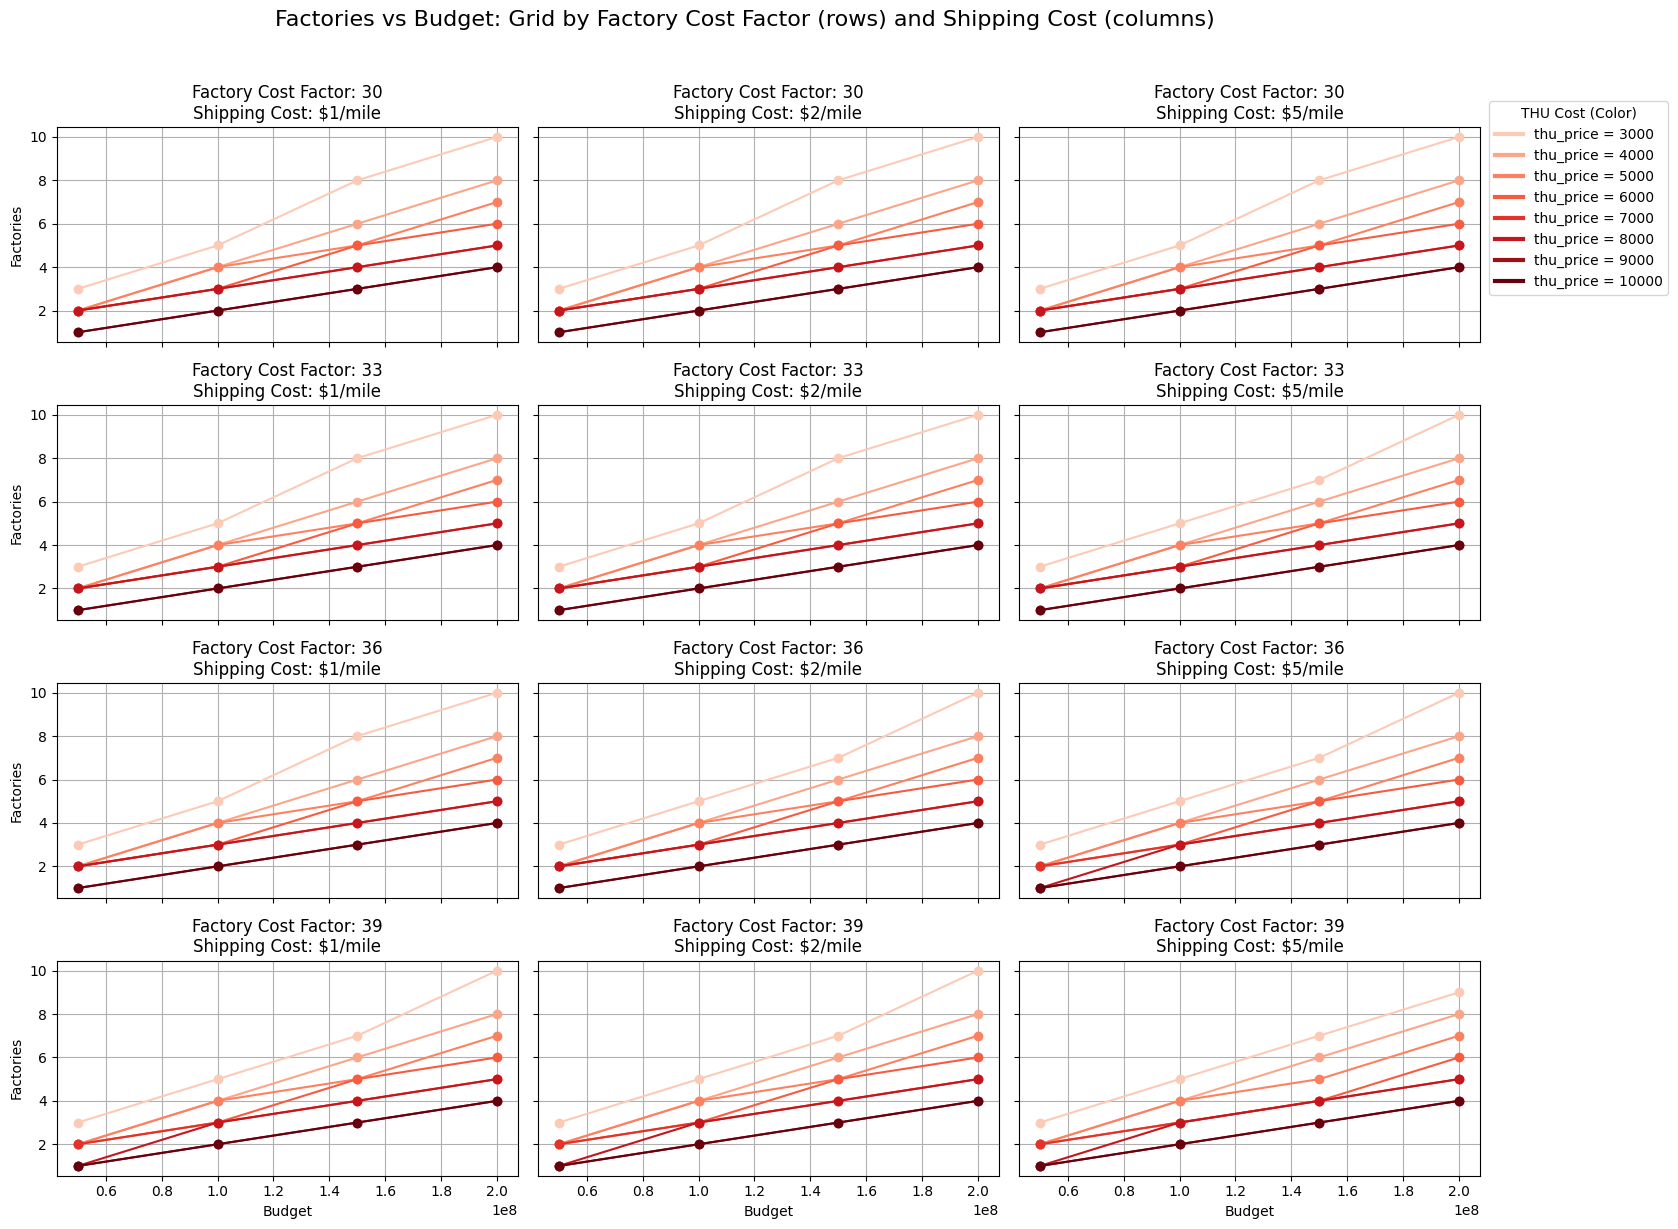

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
# from matplotlib.colors import Normalize
# import matplotlib.cm as cm

# # Load data
# df = pd.read_csv("your_data.csv")

# Parameters
budget_values = [50_000_000, 100_000_000, 150_000_000, 200_000_000]
thu_prices = sorted(df['thu_price'].unique())
factory_scalers = sorted(df['factory_scaler'].unique())  # Expecting 4 values (rows)
shipping_costs = sorted(df['shipping_cost'].unique())    # Expecting 3 values (columns)

# Set up color and marker maps
cmap = cm.Reds
norm = Normalize(vmin=min(thu_prices), vmax=max(thu_prices))
color_values = [cmap(0.2 + 0.8 * norm(tp)) for tp in thu_prices]  # avoid very light red

markers = ['o', 's', '^', 'D']
marker_map = dict(zip(thu_prices, markers))  # Optional: if you want marker by thu_price (can change if needed)

# For this plot, let's keep marker constant (e.g., 'o') since factory_scaler and shipping_cost define subplots
marker = 'o'

# Create figure and axes grid
fig, axes = plt.subplots(nrows=len(factory_scalers), ncols=len(shipping_costs), figsize=(15, 12), sharex=True, sharey=True)

for i, fs in enumerate(factory_scalers):
    for j, sc in enumerate(shipping_costs):
        ax = axes[i, j]
        for tp, color in zip(thu_prices, color_values):
            subset = df[
                (df['factory_scaler'] == fs) &
                (df['shipping_cost'] == sc) &
                (df['thu_price'] == tp) &
                (df['budget'].isin(budget_values))
            ].sort_values('budget')
            
            if subset.empty:
                continue
            
            ax.plot(
                subset['budget'],
                subset['Factories'],
                color=color,
                marker=marker,
                linestyle='-',
                label=f"Price: {tp}"
            )
        
        # Titles and labels
        ax.set_title(f"Factory Cost Factor: {fs}\nShipping Cost: ${sc}/mile")
        if i == len(factory_scalers) - 1:
            ax.set_xlabel("Budget")
        if j == 0:
            ax.set_ylabel("Factories")
        ax.grid(True)

# Create a single legend for thu_price colors outside the plot
color_handles = [Line2D([0], [0], color=color, lw=3) for color in color_values]
color_labels = [f"thu_price = {tp}" for tp in thu_prices]

fig.legend(color_handles, color_labels, title="THU Cost (Color)", loc='upper right', bbox_to_anchor=(1.12, 0.95))

plt.suptitle("Factories vs Budget: Grid by Factory Cost Factor (rows) and Shipping Cost (columns)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
